In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
data = tf.keras.datasets.mnist

In [3]:
(xtrain, ytrain),(xtest, ytest) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


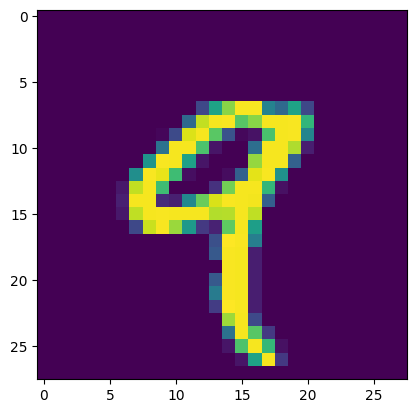

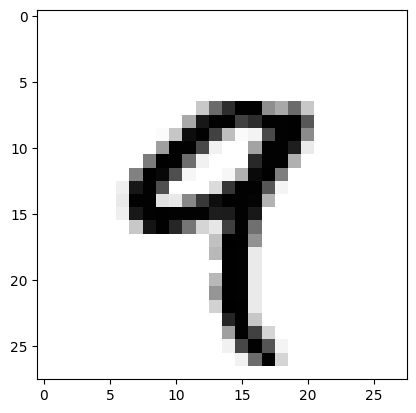

In [9]:
plt.imshow(xtrain[4])
plt.show()
plt.imshow(xtrain[4], cmap=plt.cm.binary)

# **Before Normalisation**

In [10]:
print(xtrain[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

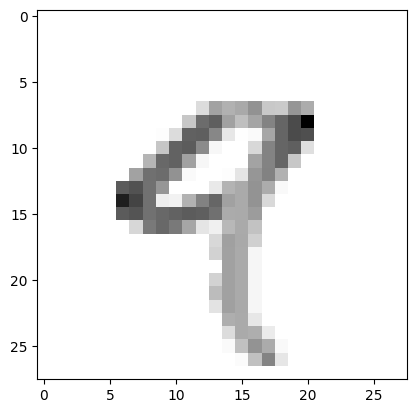

In [16]:
xtrain = tf.keras.utils.normalize(xtrain, axis=1)
xtest  = tf.keras.utils.normalize(xtest, axis=1)
plt.imshow(xtrain[4], cmap=plt.cm.binary)

# **After Normalising the Data**

In [19]:
print(xtrain[4])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [22]:
print(ytrain[4])

9


# **Reshaping image to make it suitable for applying convolutional operation**

In [23]:
xtrainr = np.array(xtrain).reshape(-1, 28, 28, 1)
xtestr  = np.array(xtest).reshape(-1, 28, 28, 1)
print("training samples dimension",xtrainr.shape)
print("testing samples dimension",xtestr.shape)

training samples dimension (60000, 28, 28, 1)
testing samples dimension (10000, 28, 28, 1)


# **Creating a deep neural network**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [29]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=xtrainr.shape[1:]))
model.add(Activation("relu"))
model.add( MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape=xtrainr.shape[1:]))
model.add(Activation("relu"))
model.add( MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape=xtrainr.shape[1:]))
model.add(Activation("relu"))
model.add( MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_12 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_13 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [31]:
print(len(xtrainr))

60000


In [32]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [33]:
model.fit(xtrainr, ytrain, epochs=5, validation_split=0.3, batch_size=1)

Epoch 1/5
42000/42000 [==============================] - 271s 6ms/step - loss: 0.2396 - accuracy: 0.9297 - val_loss: 0.1965 - val_accuracy: 0.9479
Epoch 2/5
42000/42000 [==============================] - 268s 6ms/step - loss: 0.1172 - accuracy: 0.9677 - val_loss: 0.1076 - val_accuracy: 0.9729
Epoch 3/5
42000/42000 [==============================] - 262s 6ms/step - loss: 0.1031 - accuracy: 0.9733 - val_loss: 0.1043 - val_accuracy: 0.9719
Epoch 4/5
42000/42000 [==============================] - 263s 6ms/step - loss: 0.1006 - accuracy: 0.9739 - val_loss: 0.1656 - val_accuracy: 0.9661
Epoch 5/5
42000/42000 [==============================] - 264s 6ms/step - loss: 0.1015 - accuracy: 0.9746 - val_loss: 0.1471 - val_accuracy: 0.9638


In [34]:
testloss, testacc=model.evaluate(xtestr, ytest)
print(testloss)
print(testacc)

313/313 [==============================] - 5s 14ms/step - loss: 0.1267 - accuracy: 0.9692
0.12673267722129822
0.9692000150680542


In [36]:
predicted = model.predict([xtestr])
print(predicted)

313/313 [==============================] - 4s 12ms/step
[[1.31052843e-13 1.17967954e-06 5.72771241e-04 ... 9.98945653e-01
  2.46584868e-08 7.50861145e-05]
 [3.44987967e-08 1.46460910e-09 9.99997318e-01 ... 2.99272607e-08
  2.33646915e-07 2.25183233e-18]
 [3.46845275e-16 9.99980509e-01 9.00146233e-08 ... 3.96745179e-07
  1.86526279e-06 1.26109234e-09]
 ...
 [7.81411307e-12 7.64258275e-12 2.71711564e-09 ... 1.73321069e-07
  7.44952104e-06 2.98154000e-02]
 [1.07162716e-10 5.53841803e-13 3.07363995e-10 ... 5.31482393e-11
  1.59839733e-08 1.07829865e-05]
 [1.27925421e-14 3.57692045e-29 1.98640356e-21 ... 2.79195199e-30
  3.00890620e-17 3.78379999e-18]]


In [40]:
print(np.argmax(predicted[1611]))

3


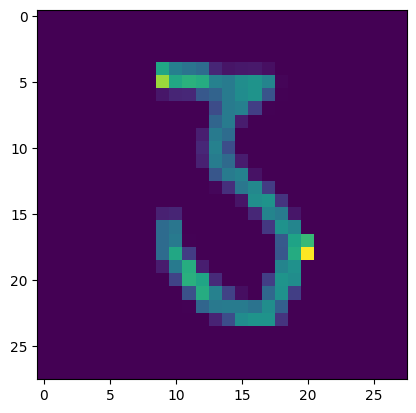

In [41]:
plt.imshow(xtest[1611])

(256, 309, 3)

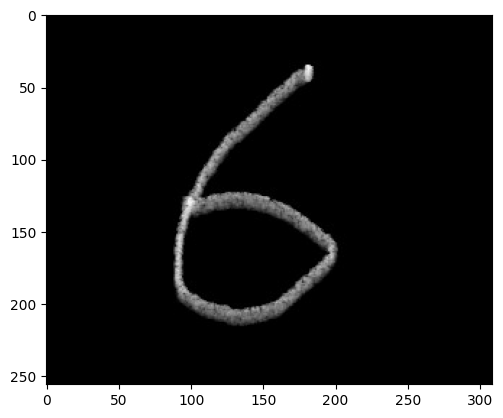

In [49]:
import cv2
img = cv2.imread('/content/two.jpg')
plt.imshow(img)
img.shape

In [50]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(256, 309)

In [51]:
resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
resized.shape

(28, 28)

In [52]:
newimg = tf.keras.utils.normalize(resized, axis=1)
newimg = np.array(newimg).reshape(-1, 28, 28, 1)
newimg.shape

(1, 28, 28, 1)

In [53]:
predicted1 = model.predict(newimg)
print(np.argmax(predicted1))

1/1 [==============================] - 0s 21ms/step
6
